# Data Cleaning and Validation Challenge

**Background:** This dataset consists of open-source articles and prices paid by Wellcome. There are 5 fields: ID, Publisher, Journal title, article title and cost. However, for the purposes of this challenge, I will use only 3 fields: Journal title, article title and cost. 

Also, initially there are 2127 rows. However, after cleaning the data, there will most likely be less rows.

In [1]:
# Import Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

In [2]:
# Upload dataset and format correctly.
df = pd.read_csv('lesson.csv',encoding="iso-8859-1")

# Get a view of the dataset.
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,Cost
0,PMC3378987\n,Elsevier,Academy of Nutrition and Dietetics,Parent support and parent mediated behaviours ...,£2379.54
1,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
2,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78
3,NaN,American Chemical Society,ACS Chemical Biology,Discovery of ?2 Adrenergic Receptor Ligands Us...,£947.07
4,PMID: 24015914 PMC3833349,American Chemical Society,ACS Chemical Biology,Discovery of an allosteric inhibitor binding s...,£1267.76


In [3]:
# Get shape to understand how many rows and columns there are.
df.shape

(2127, 5)

In [4]:
# Eliminate all pound signs to parse out strings from value. Then return the series.
df['Cost'] = df['Cost'].str.replace('£', '')
df['Cost']

0         2379.54
1         1294.59
2         1294.78
3          947.07
4         1267.76
5         2286.73
6         1186.80
7          642.89
8          693.39
9          771.42
10         773.74
11         785.60
12         807.67
13         757.18
14         774.19
15         750.16
16         653.96
17        2336.28
18         754.90
19        1901.04
20        1884.01
21        2250.97
22        2348.21
23        2270.16
24        1991.50
25        1919.51
26        2352.94
27        1928.46
28        1928.46
29        1928.46
          ...    
2097      2054.78
2098      1836.92
2099      1974.72
2100      1896.93
2101      1949.32
2102      1530.77
2103      1870.32
2104      2322.57
2105      1999.94
2106      2034.00
2107      1112.40
2108      1448.38
2109      1433.34
2110      1428.68
2111      1477.73
2112      2328.84
2113      2352.53
2114      2451.49
2115    999999.00
2116      2488.17
2117      2040.00
2118         9.93
2119      1435.05
2120      2421.96
2121      

In [5]:
# Eliminate all dollar signs then return the series. 
df['Cost'] = df['Cost'].str.replace('$', '')
df['Cost']

0         2379.54
1         1294.59
2         1294.78
3          947.07
4         1267.76
5         2286.73
6         1186.80
7          642.89
8          693.39
9          771.42
10         773.74
11         785.60
12         807.67
13         757.18
14         774.19
15         750.16
16         653.96
17        2336.28
18         754.90
19        1901.04
20        1884.01
21        2250.97
22        2348.21
23        2270.16
24        1991.50
25        1919.51
26        2352.94
27        1928.46
28        1928.46
29        1928.46
          ...    
2097      2054.78
2098      1836.92
2099      1974.72
2100      1896.93
2101      1949.32
2102      1530.77
2103      1870.32
2104      2322.57
2105      1999.94
2106      2034.00
2107      1112.40
2108      1448.38
2109      1433.34
2110      1428.68
2111      1477.73
2112      2328.84
2113      2352.53
2114      2451.49
2115    999999.00
2116      2488.17
2117      2040.00
2118         9.93
2119      1435.05
2120      2421.96
2121      

In [6]:
# Change strings in a series into numeric values to conduct mathematics on the values.
df['Cost'] = pd.to_numeric(df['Cost'])

# Get summary statistics for the new numeric values.
df['Cost'].describe()

count      2127.000000
mean      24067.339972
std      146860.665559
min           0.000000
25%        1280.000000
50%        1884.010000
75%        2321.305000
max      999999.000000
Name: Cost, dtype: float64

In [7]:
# Shrink the dataset into the values that fit within the 95% to eliminate the effect of outliers. 
df_price_95thpercentile = df['Cost'].quantile([.95])

# Print the value at the 95%. 
print(df_price_95thpercentile[.95])

3780.0


In [8]:
# Create new dataset with only the 95%.
df_95thpercentile = df[df['Cost']<df_price_95thpercentile[.95]]

# Get the shape of the new data set. 
df_95thpercentile.shape

(2017, 5)

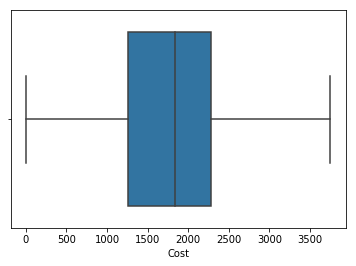

In [9]:
# Create boxplot to understand the new dataset.
sns.boxplot(x="Cost", data=df_95thpercentile);

In [10]:
# Restructure the data to return only what is needed for the challenge.
df_95thpercentile = df_95thpercentile[['Journal title', 'Article title', 'Cost']]

# Get a view of the data.
df_95thpercentile.head()

,Journal title,Article title,Cost
0,Academy of Nutrition and Dietetics,Parent support and parent mediated behaviours ...,2379.54
1,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59
2,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294.78
3,ACS Chemical Biology,Discovery of ?2 Adrenergic Receptor Ligands Us...,947.07
4,ACS Chemical Biology,Discovery of an allosteric inhibitor binding s...,1267.76


In [11]:
# Capitalize journal titles so synonymous titles will be uniform.
df_95thpercentile['Journal title'] = df_95thpercentile['Journal title'].str.capitalize()

In [12]:
# Group by journal title and get the article counts for each journal. 
df_counts = df_95thpercentile.groupby('Journal title').agg('count').reset_index()[['Journal title', 'Article title']]
df_counts.columns = ['Journal Title', 'Article Counts']

# Order by greatest to least article counts.
df_counts.sort_values('Article Counts', ascending = False)

,Journal Title,Article Counts
756,Plos one,182
498,Journal of biological chemistry,52
685,Neuroimage,29
710,Nucleic acids research,23
757,Plos pathogens,22
750,Plos genetics,22
770,Proceedings of the national academy of sciences,20
754,Plos neglected tropical diseases,20
406,Human molecular genetics,18
156,Brain,14


The 5 most common Journals and their respective article counts are: 
* Plos One: 182
* Journal of biological chemistry: 52
* Neuroimage: 29
* Nucleic acids research: 23
* Plos pathogens: 22

In [13]:
# Similarly, get the mean cost for each journal.
df_mean = df_95thpercentile.groupby('Journal title').agg(np.mean).reset_index()
df_mean.columns = ['Journal Title', 'Article Mean Cost']

df_mean

,Journal Title,Article Mean Cost
0,Academy of nutrition and dietetics,2379.540000
1,Acs chemical biology,1418.186000
2,Acs chemical neuroscience,1186.800000
3,Acs nano,668.140000
4,"Acta crystallographica section d, biological ...",771.420000
5,Acta crystallographica section d: biological c...,773.740000
6,Acta crystallographica section f: structural b...,796.635000
7,"Acta crystallographica, section d",757.180000
8,Acta crystallography d,774.190000
9,Acta d,750.160000


In [14]:
# Get the median for each journal.
df_median = df_95thpercentile.groupby('Journal title').agg(np.median).reset_index()
df_median.columns = ['Journal Title', 'Article Median Cost']

df_median

,Journal Title,Article Median Cost
0,Academy of nutrition and dietetics,2379.540
1,Acs chemical biology,1294.590
2,Acs chemical neuroscience,1186.800
3,Acs nano,668.140
4,"Acta crystallographica section d, biological ...",771.420
5,Acta crystallographica section d: biological c...,773.740
6,Acta crystallographica section f: structural b...,796.635
7,"Acta crystallographica, section d",757.180
8,Acta crystallography d,774.190
9,Acta d,750.160


In [15]:
# Get the std for each journal. Order in descending manner because there are journals with only one entry, which will return NaNs.

df_std = df_95thpercentile.groupby('Journal title').agg(np.std).reset_index()
df_std.columns = ['Journal Title', 'Article Std Cost']

df_std.sort_values('Article Std Cost', ascending = False)

,Journal Title,Article Std Cost
244,Current biology,1788.346467
693,Neuron,1763.491227
265,Developmental cell,1532.670114
368,Gastroenterology,1407.085926
789,Public health,1369.828470
186,Cell,1302.922026
282,Endeavour,1275.613562
771,Proceedings of the national academy of sciences,1275.267080
852,The embo journal,1103.086579
671,Nature communications,910.497730
